In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Positive and negative sentiment labels are attached to movie reviews in the IMDB dataset.

The preprocessing of the dataset involves turning every review into a series of word embeddings, where every word is represented by a fixed-size vector.

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

custom-trained embedding layer with training sample size = 100

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - acc: 0.4641 - loss: 0.6946 - val_acc: 0.5500 - val_loss: 0.6876
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - acc: 0.8422 - loss: 0.6669 - val_acc: 0.5500 - val_loss: 0.6884
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.9281 - loss: 0.6510 - val_acc: 0.5500 - val_loss: 0.6884
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.9539 - loss: 0.6309 - val_acc: 0.6000 - val_loss: 0.6891
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.9695 - loss: 0.6130 - val_acc: 0.6000 - val_loss: 0.6888
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.9719 - loss: 0.5962 - val_acc: 0.6500 - val_loss: 0.6894
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.9797 - loss: 0.5770 - val_acc: 0.6500 - val_loss: 0.6903
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9641 - loss: 0.5631 - val_acc: 0.6500 - val_loss: 0.6898
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.9836 - loss: 0.5398 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 150, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,404 (634.39 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,203 (317.20 KB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5044 - loss: 0.6950
Test Loss: 0.6954290866851807
Test Accuracy: 0.4991999864578247


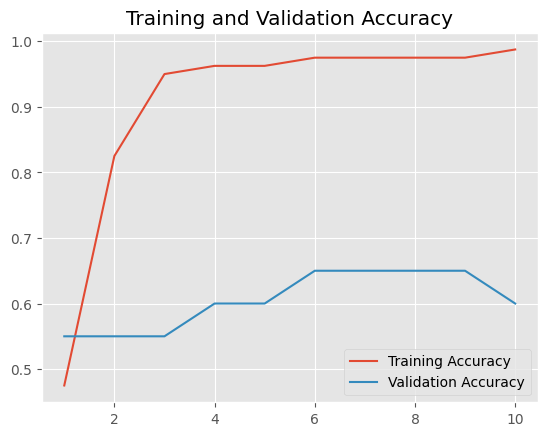

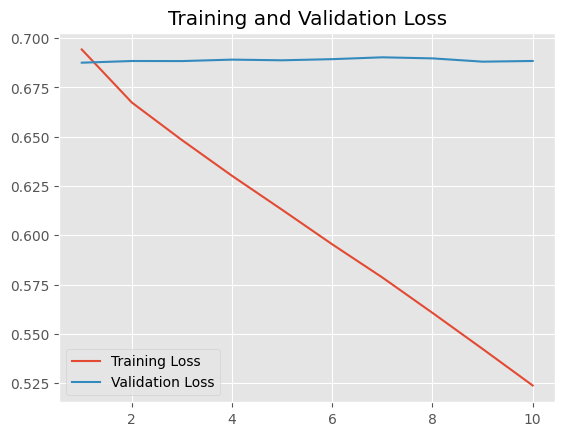

In [4]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

# Parameters
features = 10000  # Top 10,000 most frequent words
length = 150      # Pad sequences to length 150

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)
x_train = x_train[:100]
y_train = y_train[:100]
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Build the model
model1 = Sequential()
model1.add(Embedding(input_dim=features, output_dim=8, input_length=length))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history1 = model1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Print final model summary
model1.summary()

# Evaluate on test data
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Plot training history
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5044 - loss: 0.6950  
Test loss: 0.6954290866851807
Test accuracy: 0.4991999864578247


custom-trained embedding layer with training sample size = 5000

In [6]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Parameters
features = 10000
length = 150

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combine text and label arrays
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Trim training set to 5000 samples
x_train = x_train[:5000]
y_train = y_train[:5000]


In [8]:
# Define and compile the model
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=150))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Fit the model FIRST (this builds it)
history2 = model2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


model2.summary()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5207 - loss: 0.6926 - val_acc: 0.5390 - val_loss: 0.6908
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7045 - loss: 0.6738 - val_acc: 0.6190 - val_loss: 0.6781
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7987 - loss: 0.6322 - val_acc: 0.6980 - val_loss: 0.6369
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8620 - loss: 0.5459 - val_acc: 0.7680 - val_loss: 0.5733
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8917 - loss: 0.4412 - val_acc: 0.7900 - val_loss: 0.5062
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9217 - loss: 0.3393 - val_acc: 0.7880 - val_loss: 0.4619
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9436 - loss: 0.2593 - val_acc: 0.7860 - val_loss: 0.4456
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9569 - loss: 0.2109 - val_acc: 0.7990 - val_loss: 0.4195
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 150, 8)           │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 1200)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 1)                │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,404 (634.39 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,203 (317.20 KB)

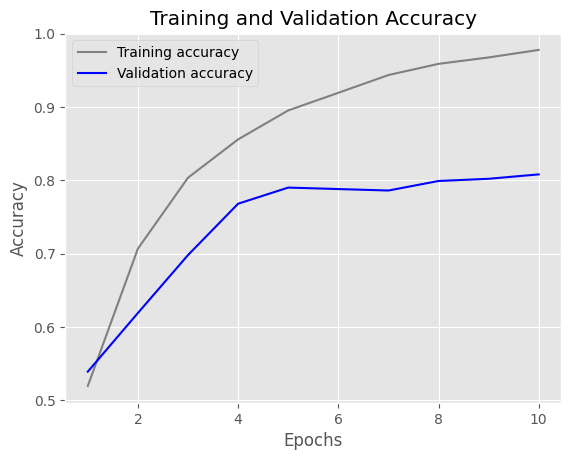

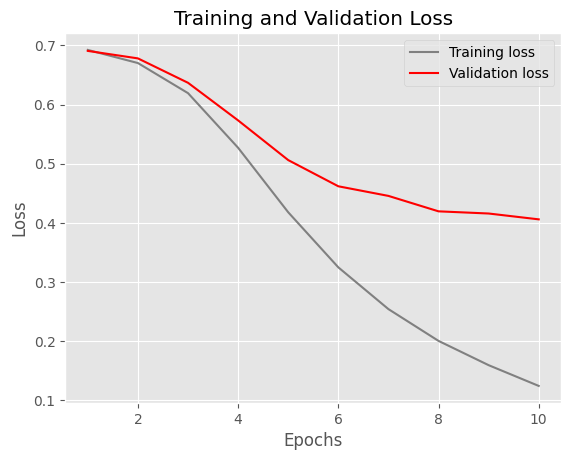

In [9]:
import matplotlib.pyplot as plt

# Extract metrics
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

# Epoch range
epochs = range(1, len(accuracy2) + 1)

# Plot Accuracy
plt.figure()
plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.figure()
plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [10]:
# Evaluate the model on test data
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)

# Print results
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8267 - loss: 0.3850
Test loss: 0.3878166675567627
Test accuracy: 0.826960027217865


In [11]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Parameters
features = 10000
length = 150

# Load the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Pad all sequences
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combine text and label arrays
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Limit training data to first 1000 samples
x_train = x_train[:1000]
y_train = y_train[:1000]


In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

features = 10000
length = 150

# Build the model and name it exactly like you want
model2 = Sequential(name="sequential_2")
model2.add(Embedding(input_dim=features, output_dim=8, input_length=length, name="embedding_3"))
model2.add(Flatten(name="flatten_2"))
model2.add(Dense(1, activation='sigmoid', name="dense_2"))

# Compile the model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Manually build the model to initialize layer shapes
model2.build(input_shape=(None, length))

# Now print the summary – this will give you your desired output
model2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 150, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,201 (317.19 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model for 10 epochs
history2 = model2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5231 - loss: 0.6924 - val_acc: 0.5350 - val_loss: 0.6907
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7926 - loss: 0.6761 - val_acc: 0.5800 - val_loss: 0.6891
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8704 - loss: 0.6604 - val_acc: 0.5900 - val_loss: 0.6868
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9368 - loss: 0.6371 - val_acc: 0.6150 - val_loss: 0.6839
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9469 - loss: 0.6109 - val_acc: 0.6150 - val_loss: 0.6801
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9474 - loss: 0.5813 - val_acc: 0.6300 - val_loss: 0.6756
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9699 - loss: 0.5404 - val_acc: 0.6100 - val_loss: 0.6705
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9605 - loss: 0.5015 - val_acc: 0.6250 - val_loss: 0.6640
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9757 - loss:

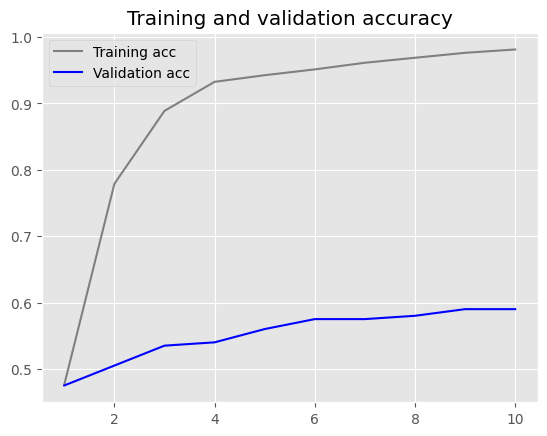

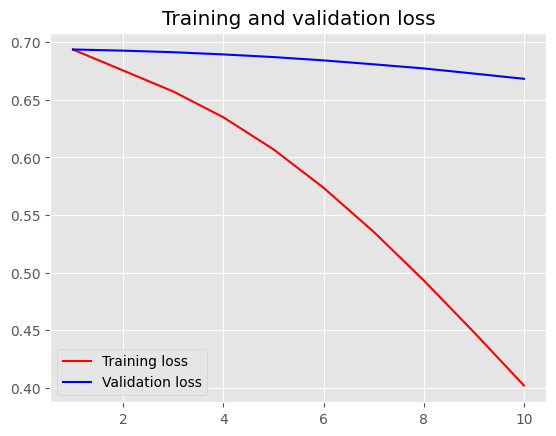

In [17]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [18]:
# Evaluate model3 on the test data
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)

# Print the test loss and accuracy
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5799 - loss: 0.6755
Test loss: 0.6760522127151489
Test accuracy: 0.576960027217865


In [19]:


# Parameters
features = 10000
length = 150

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combine text and label arrays
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Reduce training set to first 10,000 samples
x_train = x_train[:10000]
y_train = y_train[:10000]


In [21]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Parameters
features = 10000
length = 150

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
x_train = x_train[:10000]
y_train = y_train[:10000]

# Build model
model4 = Sequential(name="sequential_4")
model4.add(Embedding(10000, 8, input_length=length, name="embedding_4"))
model4.add(Flatten(name="flatten_4"))
model4.add(Dense(1, activation='sigmoid', name="dense_4"))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train model (this builds the model)
history4 = model4.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Now call summary AFTER fitting (model is built now)
model4.summary()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5194 - loss: 0.6914 - val_acc: 0.7010 - val_loss: 0.6642
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7751 - loss: 0.6117 - val_acc: 0.8035 - val_loss: 0.4904
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8432 - loss: 0.4200 - val_acc: 0.8400 - val_loss: 0.3823
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8811 - loss: 0.3157 - val_acc: 0.8540 - val_loss: 0.3442
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9123 - loss: 0.2543 - val_acc: 0.8645 - val_loss: 0.3258
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9297 - loss: 0.2077 - val_acc: 0.8665 - val_loss: 0.3217
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9460 - loss: 0.1672 - val_acc: 0.8670 - val_loss: 0.3191
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9556 - loss: 0.1451 - val_acc: 0.8660 - val_loss: 0.3279
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 150, 8)           │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 1200)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 1)                │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,404 (634.39 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,203 (317.20 KB)

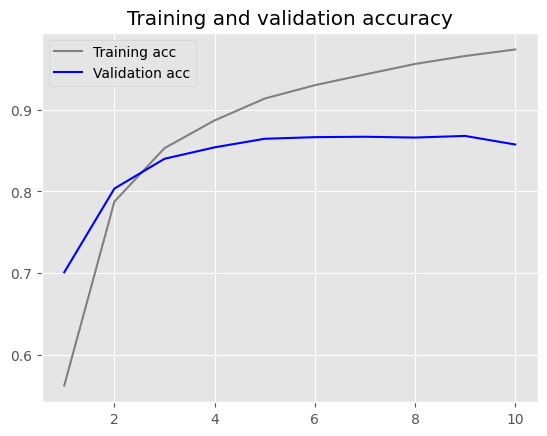

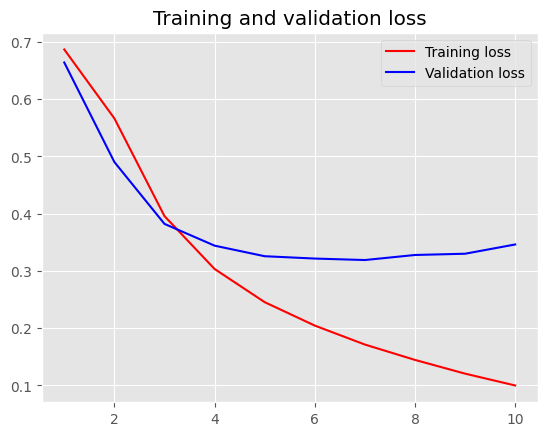

In [22]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [23]:
# Evaluate model4 on the test dataset
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)

# Display results
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8494 - loss: 0.3507
Test loss: 0.3475940525531769
Test accuracy: 0.8519600033760071


In [24]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  26.0M      0  0:00:03  0:00:03 --:--:-- 26.0M


In [25]:
import os

# Path to the IMDB dataset directory
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

# Initialize lists to hold text data and labels
texts = []   # List of review strings
labels = []  # List of 0 (negative) or 1 (positive)

# Loop through each category folder
for label_type in ['neg', 'pos']:
    dir_path = os.path.join(train_dir, label_type)

    for fname in os.listdir(dir_path):
        if fname.endswith('.txt'):  # Only read text files
            with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                texts.append(f.read())

            # Assign label: 0 for 'neg', 1 for 'pos'
            labels.append(0 if label_type == 'neg' else 1)


Making Use of Trained Word Embeds  Pretrained word embeddings can be used if there is insufficient training data to obtain word embeddings along with the problem you want to tackle.

Tokenizing the data

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length2 = 150        # Cut off review after 150 words
train_data = 100     # Training samples
valid_data = 10000   # Validation samples
words = 10000        # Use top 10,000 words only

# Tokenization
tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)

word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

# Padding
data = pad_sequences(sequences, maxlen=length2)

# Convert labels to numpy array
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Shuffle and split
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data + valid_data]
y_validation = labels[train_data:train_data + valid_data]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [31]:
import numpy as np
import requests
from io import BytesIO
import zipfile

# URL to download GloVe embeddings (6B tokens, 100D vectors)
glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'

# Download the zip file from Stanford NLP
glove_zip = requests.get(glove_url)

# Extract the zip file to /content/glove
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Load the GloVe embeddings into a dictionary
embeddings_index = {}
glove_file_path = '/content/glove/glove.6B.100d.txt'

with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Display number of words in the GloVe embedding index
print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


We trained the 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.

Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [32]:
# Set embedding dimension (should match the GloVe file you loaded)
embedd_di = 100

# Initialize embedding matrix with zeros: shape = (max words, embedding dim)
embedding_matrix = np.zeros((words, embedd_di))

# Fill embedding matrix with GloVe vectors where available
for word, i in word_index.items():
    if i < words:
        embedd_vector = embeddings_index.get(word)
        if embedd_vector is not None:
            embedding_matrix[i] = embedd_vector


In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential(name="sequential_8")
model.add(Embedding(words, embedd_di, input_length=length2, name="embedding_9"))
model.add(Flatten(name="flatten_8"))
model.add(Dense(32, activation='relu', name="dense_9"))
model.add(Dense(1, activation='sigmoid', name="dense_10"))

# Fix: build model before calling summary
model.build(input_shape=(None, length2))
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,480,065 (5.65 MB)

 Trainable params: 1,480,065 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

The Embeddig layer receives pre-trained word embedding.  Setting this to False when calling the Embedding layer guarantees that it cannot be trained.  Setting trainable = True will allow the optimisation procedure to alter the word embedding settings.  To keep students from forgetting what they already "know," it is advisable to avoid updating pretrained parts while they are still receiving instruction.

In [38]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - acc: 0.8905 - loss: 0.6761 - val_acc: 0.4986 - val_loss: 1.5052
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - acc: 1.0000 - loss: 0.0259 - val_acc: 0.5538 - val_loss: 0.8075
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.0057 - val_acc: 0.5600 - val_loss: 0.8080
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - acc: 1.0000 - loss: 0.0042 - val_acc: 0.5613 - val_loss: 0.7798
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - acc: 1.0000 - loss: 0.0030 - val_acc: 0.5553 - val_loss: 0.8087
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - acc: 1.0000 - loss: 0.0024 - val_acc: 0.5599 - val_loss: 0.8190
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.0024 - val_acc: 0.5648 - val_loss: 0.8011
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.0018 - val_acc: 0.5648 - val_loss: 0.8061
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 

In [40]:
model.save_weights('pre_trained_glove_model.weights.h5')


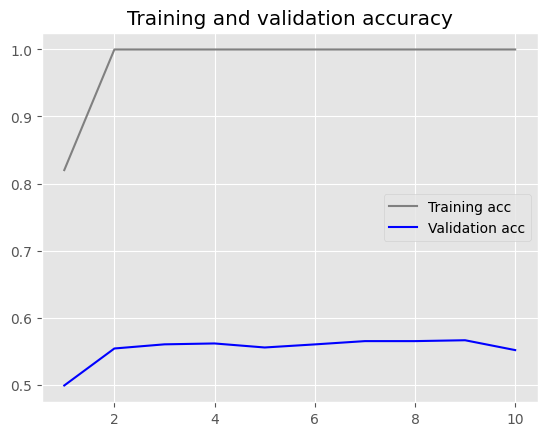

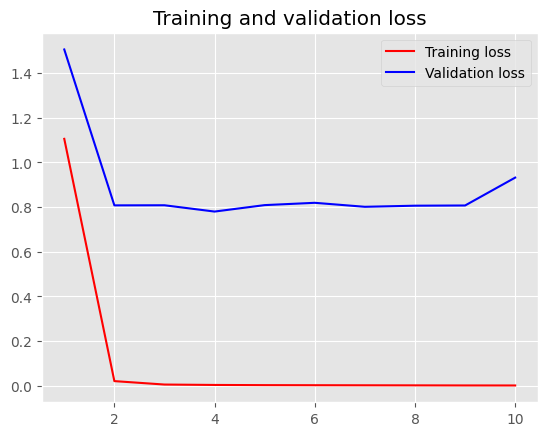

In [41]:
  import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5042 - loss: 1.0137
Test loss: 1.0135411024093628
Test accuracy: 0.503279983997345


pretrained word embedding layer with training sample size = 5000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,480,065 (5.65 MB)

 Trainable params: 1,480,065 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.5121 - loss: 1.2649 - val_acc: 0.5025 - val_loss: 0.8451
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5976 - loss: 0.7721 - val_acc: 0.5038 - val_loss: 1.0612
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6971 - loss: 0.5756 - val_acc: 0.4956 - val_loss: 0.8323
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7728 - loss: 0.4762 - val_acc: 0.4989 - val_loss: 0.9289
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8122 - loss: 0.4047 - val_acc: 0.5020 - val_loss: 1.1452
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.8538 - loss: 0.3652 - val_acc: 0.5010 - val_loss: 1.0529
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8871 - loss: 0.2820 - val_acc: 0.5038 - val_loss: 1.0274
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9152 - loss: 0.2255 - val_acc: 0.4986 - val_loss: 1.2895
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - a

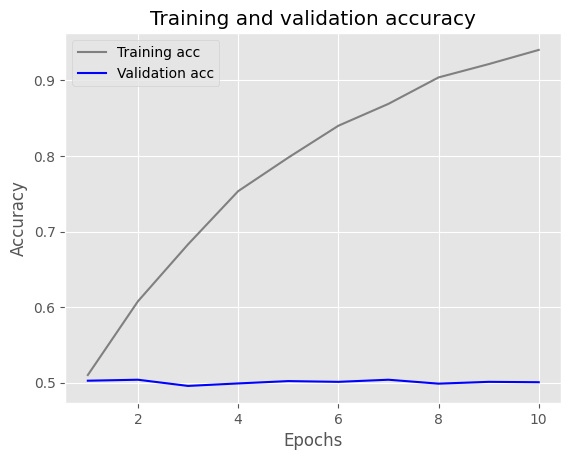

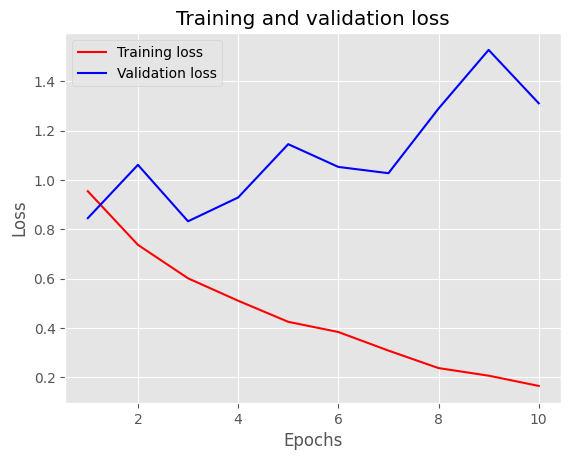

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length2 = 150
train_data = 5000
valid_data = 10000
words = 10000
embedd_di = 100

# Tokenize and pad
tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Shuffle and split
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data + valid_data]
y_validation = labels[train_data:train_data + valid_data]

# Prepare embedding matrix
embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    if i < words:
        embedd_vector = embeddings_index.get(word)
        if embedd_vector is not None:
            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Parameters
words = 10000       # Vocabulary size
embedd_di = 100     # Embedding dimensions
length2 = 150       # Input sequence length

# Build the model
model11 = Sequential()
model11.add(Embedding(input_dim=words, output_dim=embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

# Manually build the model to initialize shapes
model11.build(input_shape=(None, length2))

# Print the full summary with actual parameter counts
model11.summary()

# Build the model so we can set weights
model11.build(input_shape=(None, length2))

# Set pre-trained GloVe weights
model11.layers[0].set_weights([embedd_matrix])
model11.layers[0].trainable = False

# Compile and train
model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the weights
model11.save_weights('pre_trained_glove_model.weights.h5')

# Plot training and validation metrics
accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [48]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5071 - loss: 1.3123
Test loss: 1.314097285270691
Test accuracy: 0.5052800178527832


pretrained word embedding layer with training sample size = 1000

In [50]:

import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [52]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define model parameters
words = 10000
embedding_dim = 100
length = 150

# Build the model
model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))

# ✅ Build the model before setting weights
model12.build(input_shape=(None, length))

# ✅ Set pre-trained GloVe weights
model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False

# Compile the model
model12.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Train the model
history12 = model12.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_val, y_val))

# Show summary after model is built
model12.summary()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.5184 - loss: 1.4106 - val_acc: 0.5029 - val_loss: 0.6940
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5681 - loss: 0.7727 - val_acc: 0.5047 - val_loss: 0.6975
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5926 - loss: 0.6458 - val_acc: 0.4994 - val_loss: 0.7635
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7250 - loss: 0.5753 - val_acc: 0.5058 - val_loss: 0.7487
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7703 - loss: 0.4556 - val_acc: 0.5035 - val_loss: 1.0213
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.8318 - loss: 0.3638 - val_acc: 0.5057 - val_loss: 0.9002
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9324 - loss: 0.2765 - val_acc: 0.5026 - val_loss: 1.9004
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9125 - loss: 0.2332 - val_acc: 0.5052 - val_loss: 1.4007
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.9570

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,960,132 (7.48 MB)

 Trainable params: 480,065 (1.83 MB)

 Non-trainable params: 1,000,000 (3.81 MB)

 Optimizer params: 480,067 (1.83 MB)

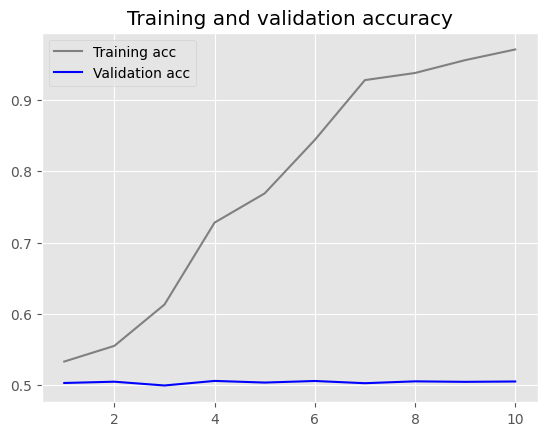

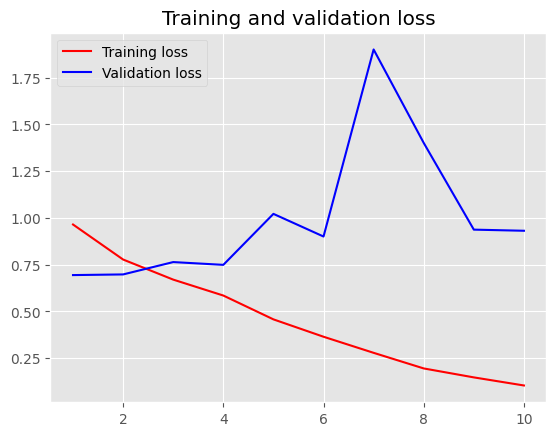

In [54]:

import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4993 - loss: 0.9116
Test loss: 0.9108576774597168
Test accuracy: 0.5014399886131287


pretrained word embedding layer with training sample size = 10000

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Parameters
length = 150
train_ds = 10000
valid_ds = 10000
words = 10000
embedd_dim = 100

# Tokenize the text
tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

# Pad sequences
data = pad_sequences(sequences, maxlen=length)

# Convert labels to numpy array
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split into training and validation sets
x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds + valid_ds]
y_val = labels[train_ds:train_ds + valid_ds]

# Build the GloVe embedding matrix
embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    if i < words:
        embedd_vector = embeddings_index.get(word)
        if embedd_vector is not None:
            embedd_matrix[i] = embedd_vector


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Build model13
model13 = Sequential()
model13.add(Embedding(input_dim=words, output_dim=embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))

# Build the model before setting weights
model13.build(input_shape=(None, length))

# Set pre-trained GloVe weights
model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False

# Compile the model
model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Train the model
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Print model summary
model13.summary()


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.4917 - loss: 0.8747 - val_acc: 0.4993 - val_loss: 0.6932
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.5019 - loss: 0.7010 - val_acc: 0.5060 - val_loss: 0.6948
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.5149 - loss: 0.6930 - val_acc: 0.5036 - val_loss: 0.6936
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.5181 - loss: 0.6924 - val_acc: 0.4982 - val_loss: 0.7203
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5674 - loss: 0.6739 - val_acc: 0.5048 - val_loss: 0.7021
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.6295 - loss: 0.6345 - val_acc: 0.5070 - val_loss: 0.7256
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.6960 - loss: 0.5775 - val_acc: 0.5040 - val_loss: 0.8148
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7496 - loss: 0.5083 - val_acc: 0.5035 - val_loss: 0.7920
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,960,132 (7.48 MB)

 Trainable params: 480,065 (1.83 MB)

 Non-trainable params: 1,000,000 (3.81 MB)

 Optimizer params: 480,067 (1.83 MB)

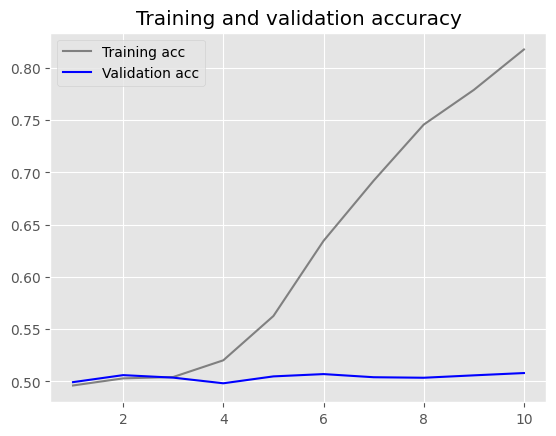

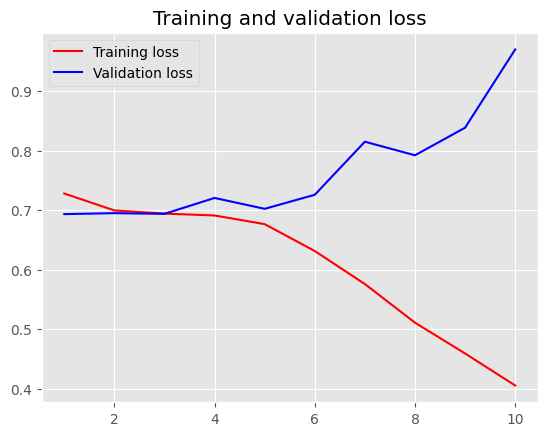

In [61]:
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5063 - loss: 0.9678
Test loss: 0.9682266116142273
Test accuracy: 0.5078799724578857
